<a href="https://colab.research.google.com/github/Ishanavi/DigitRecognition1/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(pd.Series(y).value_counts())
classes = ['0','1','2','3','4','5','6','7','8','9']
n_classes = len(classes)

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64


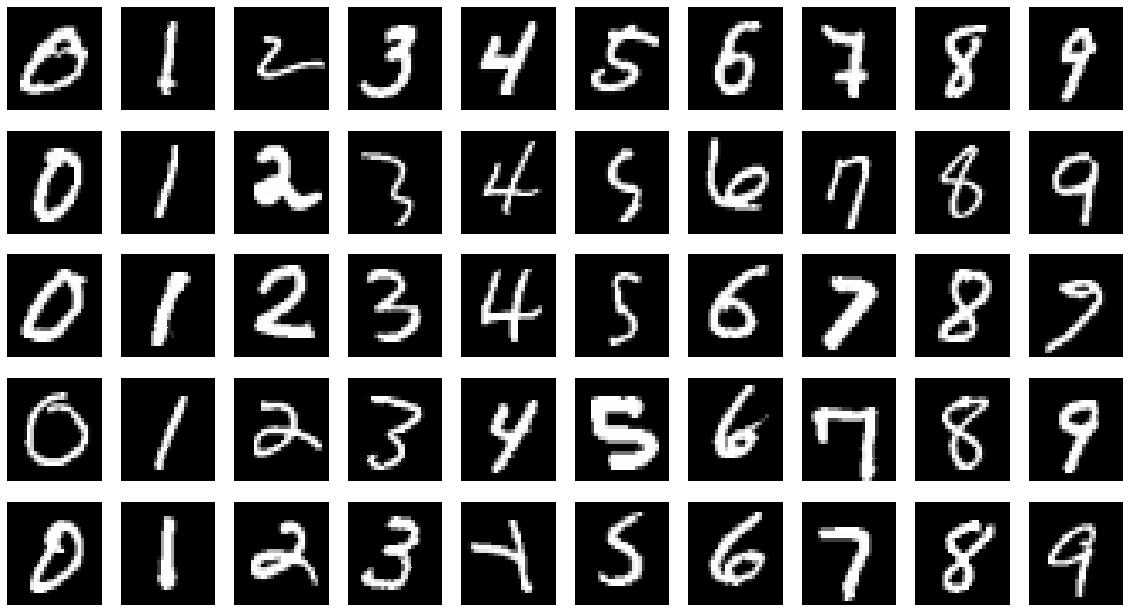

In [3]:
sample_per_class = 5
figure = plt.figure(figsize = (n_classes*2,(1+sample_per_class*2)))
idx_cls = 0

for cls in classes:
  idxs = np.flatnonzero(y==cls)
  idxs = np.random.choice(idxs, sample_per_class, replace=False)
  i = 0

  for idx in idxs:
    plt_idx = i * n_classes+ idx_cls + 1
    p = plt.subplot(sample_per_class, n_classes, plt_idx)
    p = sns.heatmap(np.array(X.loc[idx]).reshape(28,28), cmap = plt.cm.gray, xticklabels = False, yticklabels = False, cbar = False)
    p = plt.axis('off')
    i+=1

  idx_cls+=1

In [4]:
print(len(X))
print(len(X.loc[0]))
print(X.loc[0])
print(y.loc[0])

70000
784
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
5


In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 2500, train_size = 7500, random_state = 9)

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0
clf = LogisticRegression(solver = 'saga', multi_class = 'multinomial').fit(x_train_scaled, y_train)

y_predict = clf.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy = ",accuracy)

accuracy =  0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


default solver for LogisticRegression is liblinear efficient for binary

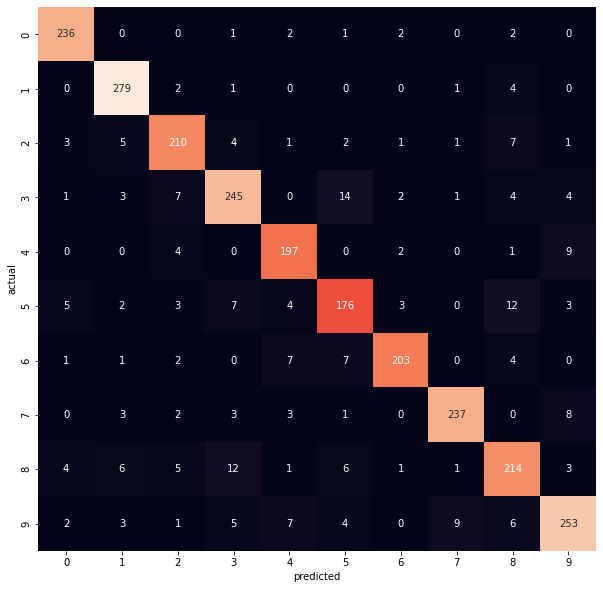

In [6]:
cm = pd.crosstab(y_test, y_predict, rownames = ['actual'], colnames=['predicted'])
p = plt.figure(figsize = (10,10))
p = sns.heatmap(cm, annot= True, fmt="d", cbar=False)